In [319]:
import sys
# from python_environment_check import check_packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")

# Function to replace the year with the previous year if the datetime is in the future
def replace_year_if_future(datetime_str):
    # Convert the datetime string to a datetime object
    datetime_obj = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
    
    # Get the current date
    current_date = datetime.now()
    
    # If the datetime is in the future, replace the year with the previous year
    if datetime_obj > current_date:
        previous_year = datetime_obj.year - 1
        new_datetime_obj = datetime_obj.replace(year=previous_year)
        return new_datetime_obj.strftime("%Y-%m-%d %H:%M:%S")
    else:
        return datetime_str

'text/html'

'<style>.container { width:550% !important; }</style>'

# Kutyák alapadatai

In [320]:
dfk = pd.DataFrame()
dfk = pd.read_csv('01.kutyak_alapadatai.csv',sep=';', encoding='utf-8')
dfk.head(5)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.95,32.5
4,DP910919,Ashley,border collie,szuka,ivartalan,2015-01-26,93900009738344,18.30,32.5


In [321]:
print(dfk['fajta'].unique())

['Kooikerhondje' 'Border Collie' 'Border' 'border collie'
 'American Staffordshire Terrier' 'Jack Russell Terrier' 'Keverék'
 'Magyar Vizsla' 'Mix' 'Australian Kelpie' 'Parson Russell terrier'
 'Small schnauzer' 'Sheltie' 'BorderCollie' 'Australian Shepperd'
 'Belgian shepherd - Malinois' 'Patterdale terrier' 'Mudi' 'Whippet']


In [322]:
dfk.replace('border collie', 'Border Collie', inplace=True)
dfk.replace('BorderCollie', 'Border Collie', inplace=True)
dfk.replace('Mix', 'Keverék', inplace=True)
print(dfk['fajta'].unique())

['Kooikerhondje' 'Border Collie' 'Border' 'American Staffordshire Terrier'
 'Jack Russell Terrier' 'Keverék' 'Magyar Vizsla' 'Australian Kelpie'
 'Parson Russell terrier' 'Small schnauzer' 'Sheltie'
 'Australian Shepperd' 'Belgian shepherd - Malinois' 'Patterdale terrier'
 'Mudi' 'Whippet']


In [323]:
dfk.head(5)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.95,32.5
4,DP910919,Ashley,Border Collie,szuka,ivartalan,2015-01-26,93900009738344,18.30,32.5


In [324]:
dfk.describe()

,chip_szam,ulna_hossz,ugrasi_magassag
count,5.100000e+01,51.000000,51.000000
mean,9.390001e+13,21.173922,28.039216
std,2.736045e+06,29.464890,4.281172
min,9.390000e+13,1.209000,15.000000
25%,9.390000e+13,14.960000,26.250000
50%,9.390001e+13,16.280000,27.500000
75%,9.390001e+13,17.775000,32.500000
max,9.390001e+13,175.500000,32.500000


In [325]:
print(sorted(dfk['ulna_hossz'].unique()))

[1.209, 1.491, 9.67, 10.02, 11.71, 13.03, 13.6, 14.04, 14.05, 14.3, 14.36, 14.7, 14.8, 15.12, 15.22, 15.23, 15.26, 15.28, 15.36, 15.38, 15.46, 15.71, 15.77, 15.84, 16.01, 16.28, 16.52, 16.54, 16.56, 16.73, 16.84, 17.08, 17.2, 17.3, 17.35, 17.68, 17.74, 17.81, 17.95, 17.99, 18.0, 18.02, 18.06, 18.16, 18.29, 18.3, 152.8, 175.5]


In [326]:
dfk.replace(1.209, 12.09, inplace=True)
dfk.replace(1.491, 14.91, inplace=True)
dfk.replace(175.5, 17.55, inplace=True)
dfk.replace(152.8, 15.28, inplace=True)
print(sorted(dfk['ulna_hossz'].unique()))

[9.67, 10.02, 11.71, 12.09, 13.03, 13.6, 14.04, 14.05, 14.3, 14.36, 14.7, 14.8, 14.91, 15.12, 15.22, 15.23, 15.26, 15.28, 15.36, 15.38, 15.46, 15.71, 15.77, 15.84, 16.01, 16.28, 16.52, 16.54, 16.56, 16.73, 16.84, 17.08, 17.2, 17.3, 17.35, 17.55, 17.68, 17.74, 17.81, 17.95, 17.99, 18.0, 18.02, 18.06, 18.16, 18.29, 18.3]


In [327]:
dfk.head(5)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.95,32.5
4,DP910919,Ashley,Border Collie,szuka,ivartalan,2015-01-26,93900009738344,18.30,32.5


In [328]:
dfk.to_csv('02.Kutyak.alapadatai.temp.csv', sep=';', index=False)  

In [329]:
dfk = pd.DataFrame()
#dfk = pd.read_csv('02.Kutyak.alapadatai.temp.csv',sep=';', encoding='utf-8', header=None)
dfk = pd.read_csv('02.Kutyak.alapadatai.temp.csv',sep=';', encoding='utf-8')
dfk.head(5)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.95,32.5
4,DP910919,Ashley,Border Collie,szuka,ivartalan,2015-01-26,93900009738344,18.30,32.5


In [330]:
# calculate duplicates
dups = dfk.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(dfk[dups])

False
Empty DataFrame
Columns: [felvezeto, nev, fajta, nem, ivar, szuletesi_datum, chip_szam, ulna_hossz, ugrasi_magassag]
Index: []


In [331]:
# summarize the number of rows with missing values for each column
#for i in range(dfk.shape[1]):
# count number of rows with missing values
#    n_miss = dfk[[i]].isnull().sum()
#    perc = n_miss / dfk.shape[0] * 100
#    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column
 

In [332]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   felvezeto        51 non-null     object 
 1   nev              51 non-null     object 
 2   fajta            51 non-null     object 
 3   nem              51 non-null     object 
 4   ivar             51 non-null     object 
 5   szuletesi_datum  51 non-null     object 
 6   chip_szam        51 non-null     int64  
 7   ulna_hossz       51 non-null     float64
 8   ugrasi_magassag  51 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.7+ KB


In [333]:
dfk.to_csv('02.Kutyak.alapadatai.csv', sep=';', index=False)  

# EFC Versenyadatok

In [334]:
dfh = pd.DataFrame()
dfh = pd.read_csv('01.EFC_versenyadatok.csv',sep=';', encoding='utf-8', header=None)
dfh.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
1,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15,Chase,...,Rubble,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14,8
2,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25,Brix,...,Them,OK,5.2,Negro,0.51,4.89,Speedy,0.4,4.93,4
3,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15,Chase,...,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,8
4,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25,Brix,...,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,4


In [335]:
# calculate duplicates
dups = dfh.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(dfh[dups])

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Index: []

[0 rows x 22 columns]


In [336]:
# summarize the number of rows with missing values for each column
for i in range(dfh.shape[1]):
# count number of rows with missing values
    n_miss = dfh[[i]].isnull().sum()
    perc = n_miss / dfh.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 10 (0.8%)
> 8, Missing: 30 (2.5%)
> 9, Missing: 27 (2.3%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 35 (3.0%)
> 13, Missing: 26 (2.2%)
> 14, Missing: 8 (0.7%)
> 15, Missing: 30 (2.5%)
> 16, Missing: 27 (2.3%)
> 17, Missing: 10 (0.8%)
> 18, Missing: 39 (3.3%)
> 19, Missing: 35 (3.0%)
> 20, Missing: 19 (1.6%)
> 21, Missing: 0 (0.0%)


C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1417627797.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1417627797.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1417627797.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1417627797.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) in

In [337]:
dfh = pd.DataFrame()
dfh = pd.read_csv('01.EFC_versenyadatok.csv',sep=';', encoding='utf-8')
dfh.head(5)

,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
0,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,...,Rubble,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14,8
1,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,...,Them,OK,5.2,Negro,0.51,4.89,Speedy,0.4,4.93,4
2,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,...,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,8
3,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,...,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,4
4,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,...,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,8


In [338]:
dfh.describe(include='all')

,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
count,1176,1176,1176.000000,1176,1176,1176,1176.000000,1166,1146.000000,1149,...,1141,1150,1168,1146,1149,1166,1137,1141,1157,1176.000000
unique,4,1,NaN,588,87,87,NaN,5,NaN,114,...,125,85,212,134,91,228,131,133,267,NaN
top,EFC_2 ring_1,Tápiószentmárton,NaN,2023-07-30 13:08:00,RUNAMI A,RUNAMI A,NaN,L,NaN,Chase,...,Rubble,OK,4.09,Zuma,OK,4.06,Marshall,OK,4.08,NaN
freq,370,1176,NaN,4,25,25,NaN,485,NaN,117,...,117,270,23,117,248,22,117,210,16,NaN
mean,NaN,NaN,6.916667,NaN,NaN,NaN,19.215536,NaN,22.323298,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.993197
std,NaN,NaN,3.662093,NaN,NaN,NaN,4.775336,NaN,4.287228,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000839
min,NaN,NaN,1.000000,NaN,NaN,NaN,3.750000,NaN,15.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,NaN,4.000000,NaN,NaN,NaN,16.617500,NaN,17.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,7.000000,NaN,NaN,NaN,18.255000,NaN,22.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,10.000000,NaN,NaN,NaN,19.952500,NaN,25.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000


In [339]:
# Replace 'OK' with 0
dfh.replace('OK', 0.0, inplace=True)
# Replace 'OK' with 0
dfh.replace('Ok', 0.0, inplace=True)
# Replace 'OK' with 0
dfh.replace('oK', 0.0, inplace=True)
# Replace 'OK' with 0
dfh.replace('ok', 0.0, inplace=True)
# Replace 'vbehl' with 'run_in'
dfh.replace('vbehl', 'run_in', inplace=True)
# Replace 'mimo' with 'outside'
dfh.replace('mimo', 'outside', inplace=True)
# Replace 'chyba' with 'error'
dfh.replace('chyba', 'error', inplace=True)
# Replace 'V' with 'W'
dfh['WLT'].replace('V', 'W', inplace=True)
# Replace 'P' with 'L'
dfh['WLT'].replace('P', 'L', inplace=True)
# Replace 'R' with 'T'
dfh['WLT'].replace('R', 'T', inplace=True)
# Replace 'R' with 'T'
dfh['colour'].replace(4, 'P', inplace=True)
# Replace 'R' with 'T'
dfh['colour'].replace(8, 'K', inplace=True)
dfh['when'] = pd.to_datetime(dfh['when'])
old_year = 2123  # Old year value
new_year = 2023  # New year value
dfh.loc[dfh['when'].dt.year == old_year, 'when'] += pd.DateOffset(years=new_year - old_year)

dfh.head(5)

,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
0,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,...,Rubble,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14,K
1,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,...,Them,0.0,5.2,Negro,0.51,4.89,Speedy,0.4,4.93,P
2,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,...,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,K
3,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,...,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,P
4,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,...,Rubble,0.33,5.13,Zuma,0.0,4.67,Marshall,0.12,6.09,K


__A mutatószámokat és az oszlopneveiket pivotáljuk__

In [340]:
#melt converts the values to two columns: variable (the column names) and quantity (values)
df = pd.melt(dfh, id_vars=['run','place','division','when','who','withwho','total','WLT','hurdless','colour'], var_name="quantity")
df.head(5)
selected_row = df[(df['run'] == 'EFC_1 ring_1')
                & (df['place'] == 'Tápiószentmárton')
                & (df['division'] == 13)
                & (df['when'] == '2023-07-29 12:26:30')
                & (df['who'] == 'Real Ballance Flyball Team')
                & (df['withwho'] == 'WildRunners Zephyr')
                & (df['total'] == 21.18)
                & (df['WLT'] == 'L')
                & (df['hurdless'] == 15.0)
                 ]
#selected_row = df.iloc[0]
print(selected_row)
df.head()

                run             place  division                when  \
0      EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
1176   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
2352   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
3528   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
4704   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
5880   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
7056   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
8232   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
9408   EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
10584  EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
11760  EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   
12936  EFC_1 ring_1  Tápiószentmárton        13 2023-07-29 12:26:30   

                              who             withwho  total WLT  hurdless  

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,quantity,value
0,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,K,name.1,Chase
1,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,P,name.1,Brix
2,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,K,name.1,Chase
3,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,P,name.1,Brix
4,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,K,name.1,Chase


__A névből kiemeljük a futamsorszámot:__  _running_ <br>
__Az oszlopnév tartalma alapján pivotáljuk a következőket:__ _dog, name. start_

In [341]:
# Split 'variable' column into 'tests' and 'slots'
dfa = df[['Semantic', 'running']] = df['quantity'].str.split('.', expand=True)
df.drop(['quantity'], axis=1, inplace=True)

dfa = df.pivot_table(index=['run','place','division','when','who','withwho','total','WLT','hurdless','colour','running'], 
                      columns='Semantic', 
                      values='value', 
                      aggfunc='max').reset_index().rename_axis(None, axis=1)
print(dfa)

               run             place  division                when  \
0     EFC_1 ring_1  Tápiószentmárton        10 2023-07-29 13:09:57   
1     EFC_1 ring_1  Tápiószentmárton        10 2023-07-29 13:09:57   
2     EFC_1 ring_1  Tápiószentmárton        10 2023-07-29 13:09:57   
3     EFC_1 ring_1  Tápiószentmárton        10 2023-07-29 13:09:57   
4     EFC_1 ring_1  Tápiószentmárton        10 2023-07-29 13:09:57   
...            ...               ...       ...                 ...   
4531  EFC_2 ring_2  Tápiószentmárton         8 2023-07-30 16:03:00   
4532  EFC_2 ring_2  Tápiószentmárton         8 2023-07-30 16:03:00   
4533  EFC_2 ring_2  Tápiószentmárton         8 2023-07-30 16:03:00   
4534  EFC_2 ring_2  Tápiószentmárton         8 2023-07-30 16:03:00   
4535  EFC_2 ring_2  Tápiószentmárton         8 2023-07-30 16:03:00   

                      who              withwho  total WLT  hurdless colour  \
0           Be Quickstep!    Running Borders 2  19.48   W      17.5      K   
1  

In [342]:
dfa.to_csv('02.EFC_versenyadatok.temp1.csv', sep=';', index=False)  

In [343]:
dfh = pd.DataFrame()
dfh = pd.read_csv('02.EFC_versenyadatok.temp1.csv',sep=';', encoding='utf-8')
dfh.head(12)

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,1,4.68,Chulo,0.05
1,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,2,4.89,Skipper,0.35
2,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,3,4.3,Yuma,0.11
3,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,4,5.11,Yummy,0.0
4,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,1,4.6,Nacho,0.13
5,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,2,4.32,Sammy,0.0
6,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,3,4.67,Janis,0.13
7,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,4,NaN,Ouzo,NaN
8,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:11:04,Be Quickstep!,Running Borders 2,18.63,W,17.5,K,1,4.96,Chulo,0.17
9,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:11:04,Be Quickstep!,Running Borders 2,18.63,W,17.5,K,2,4.95,Skipper,0.0


In [344]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   run       4536 non-null   object 
 1   place     4536 non-null   object 
 2   division  4536 non-null   int64  
 3   when      4536 non-null   object 
 4   who       4536 non-null   object 
 5   withwho   4536 non-null   object 
 6   total     4536 non-null   float64
 7   WLT       4536 non-null   object 
 8   hurdless  4536 non-null   float64
 9   colour    4536 non-null   object 
 10  running   4536 non-null   int64  
 11  dog       4524 non-null   object 
 12  name      4523 non-null   object 
 13  start     4474 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 496.3+ KB


__a dog és start mezők tartalmaznak nem numerikus típusokat is__

In [345]:
dfh = pd.DataFrame()
dfh = pd.read_csv('02.EFC_versenyadatok.temp1.csv',sep=';', encoding='utf-8', header=None)
dfh.head(12)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
1,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,1,4.68,Chulo,0.05
2,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,2,4.89,Skipper,0.35
3,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,3,4.3,Yuma,0.11
4,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,4,5.11,Yummy,0.0
5,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,1,4.6,Nacho,0.13
6,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,2,4.32,Sammy,0.0
7,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,3,4.67,Janis,0.13
8,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,4,NaN,Ouzo,NaN
9,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:11:04,Be Quickstep!,Running Borders 2,18.63,W,17.5,K,1,4.96,Chulo,0.17


In [346]:
# summarize the number of rows with missing values for each column
for i in range(dfh.shape[1]):
# count number of rows with missing values
  n_miss = dfh[[i]].isnull().sum()
  perc = n_miss / dfh.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 12 (0.3%)
> 12, Missing: 13 (0.3%)
> 13, Missing: 62 (1.4%)


C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1658979559.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1658979559.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1658979559.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\1658979559.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) in

In [347]:
dfh = pd.DataFrame()
dfh = pd.read_csv('02.EFC_versenyadatok.temp1.csv',sep=';', encoding='utf-8')
dfh.head(12)

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,1,4.68,Chulo,0.05
1,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,2,4.89,Skipper,0.35
2,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,3,4.3,Yuma,0.11
3,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,4,5.11,Yummy,0.0
4,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,1,4.6,Nacho,0.13
5,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,2,4.32,Sammy,0.0
6,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,3,4.67,Janis,0.13
7,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,4,NaN,Ouzo,NaN
8,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:11:04,Be Quickstep!,Running Borders 2,18.63,W,17.5,K,1,4.96,Chulo,0.17
9,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:11:04,Be Quickstep!,Running Borders 2,18.63,W,17.5,K,2,4.95,Skipper,0.0


In [348]:
# túlsokat törölt
#condition = ((dfh['WLT'] == 'L') & 
#             ((dfh['dog'].isna()) | (dfh['dog'] == 'outside') | (dfh['dog'] == 'run in') |
#              (dfh['start'].isna()) | (dfh['start'] == 'error')))
#f_dfh = dfh[~condition]
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   run       4536 non-null   object 
 1   place     4536 non-null   object 
 2   division  4536 non-null   int64  
 3   when      4536 non-null   object 
 4   who       4536 non-null   object 
 5   withwho   4536 non-null   object 
 6   total     4536 non-null   float64
 7   WLT       4536 non-null   object 
 8   hurdless  4536 non-null   float64
 9   colour    4536 non-null   object 
 10  running   4536 non-null   int64  
 11  dog       4524 non-null   object 
 12  name      4523 non-null   object 
 13  start     4474 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 496.3+ KB


__további Nan értékeket keresünk__

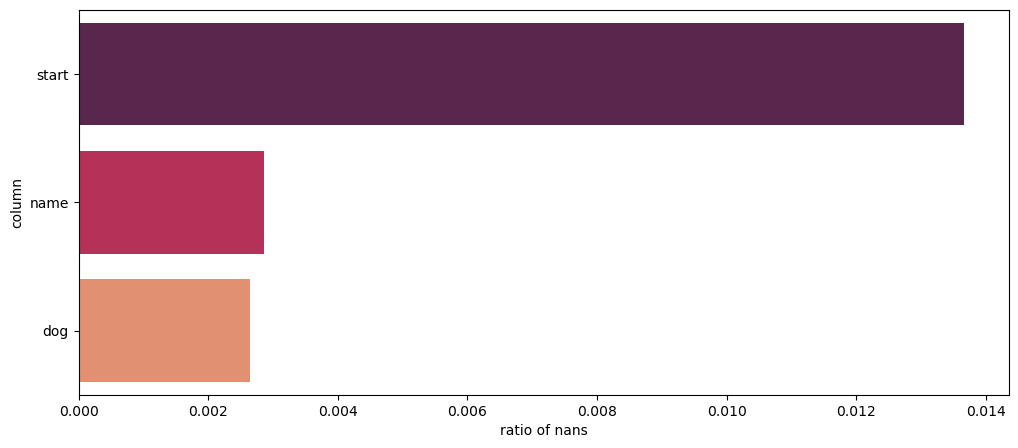

In [349]:
#g = dfh[dfh.columns[dfh.isna().any(0)]].isna().sum().sort_values(ascending=False) / dfh.shape[0]
g = dfh[dfh.columns[dfh.isna().any()]].isna().sum().sort_values(ascending=False) / dfh.shape[0]
g = g.reset_index().rename(columns={'index': 'column', 0: 'nans'})
sns.barplot(x='nans', y='column', data=g, ax=plt.subplots(1,1,figsize=(12,5))[1], palette='rocket')
plt.xlabel('ratio of nans');

__az üres name mezőket tartalmazó sorok törölhetők, ezeket nem tudjuk előállítani más adatból__

In [350]:
condition = (dfh['name'].isna()) 
filtered_dfh = dfh[~condition]

In [351]:
# Replace 'run in' with np.nan
filtered_dfh['dog'].replace('run in', np.nan, inplace=True)
# Replace 'run in' with np.nan
filtered_dfh['dog'].replace('run_in', np.nan, inplace=True)
# Replace 'run in' with np.nan
filtered_dfh['dog'].replace('error', np.nan, inplace=True)
# Replace 'run in' with np.nan
filtered_dfh['dog'].replace('outside', np.nan, inplace=True)
# Replace 'error' with np.nan
filtered_dfh['start'].replace('error', np.nan, inplace=True)
# Replace 'error' with np.nan
filtered_dfh['start'].replace('run in', np.nan, inplace=True)
# Replace 'error' with np.nan
filtered_dfh['start'].replace('run_in', np.nan, inplace=True)

# Replace '2123' with '2023'
filtered_dfh['when'] = pd.to_datetime(filtered_dfh['when'])
# Az évek cseréje 2123-ról 2023-ra
old_year = 2123
new_year = 2023
filtered_dfh['when'] = filtered_dfh['when'].mask(filtered_dfh['when'].dt.year == old_year, 
                                                   filtered_dfh['when'] + pd.offsets.DateOffset(years=new_year - old_year))
filtered_dfh['when'] = filtered_dfh['when'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Az évek cseréje 2024-ről 2023-ra azoknál az időpontoknál, amelyek a jövőben vannak
filtered_dfh['when'] = filtered_dfh['when'].apply(replace_year_if_future)


C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\3377447016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dfh['dog'].replace('run in', np.nan, inplace=True)
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\3377447016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dfh['dog'].replace('run_in', np.nan, inplace=True)
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\3377447016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [352]:
dfh = filtered_dfh

dfh['dog'] = pd.to_numeric(dfh['dog'].fillna('0'))
#print(dfh['dog'].unique())
mean_dog = dfh['dog'].mean()
dfh['dog'].replace(0., mean_dog, inplace=True)

dfh['start'] = pd.to_numeric(dfh['start'].fillna(0))
mean_start = dfh['start'].mean()
dfh['start'].replace(0., mean_start, inplace=True)

In [353]:
#for c in dfh.select_dtypes('number'):
#    dfh[c] = dfh[c].fillna(dfh[c].mean())
#dfh.head(5)

In [354]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4523 entries, 0 to 4535
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   run       4523 non-null   object 
 1   place     4523 non-null   object 
 2   division  4523 non-null   int64  
 3   when      4523 non-null   object 
 4   who       4523 non-null   object 
 5   withwho   4523 non-null   object 
 6   total     4523 non-null   float64
 7   WLT       4523 non-null   object 
 8   hurdless  4523 non-null   float64
 9   colour    4523 non-null   object 
 10  running   4523 non-null   int64  
 11  dog       4523 non-null   float64
 12  name      4523 non-null   object 
 13  start     4523 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 530.0+ KB


In [355]:
dfh.to_csv('02.EFC_versenyadatok.csv', sep=';', index=False)  

# FLYBALLCZ_versenyadatok

In [356]:
dfc = pd.DataFrame()
dfc = pd.read_csv('01.FLYBALLCZ_versenyadatok.csv',sep=';', encoding='utf-16', header=None)
dfc.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
1,Hanacke skvarek,Heroltice,1,2023-04-22 10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25,Sunny,...,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,5
2,Hanacke skvarek,Heroltice,1,2023-04-22 10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25,Brooke,...,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,3
3,Hanacke skvarek,Heroltice,1,2023-04-22 10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25,Sunny,...,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,5
4,Hanacke skvarek,Heroltice,1,2023-04-22 10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25,Brooke,...,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,3


In [357]:
# calculate duplicates
dups = dfc.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(dfc[dups])

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Index: []

[0 rows x 22 columns]


In [358]:
# summarize the number of rows with missing values for each column
for i in range(dfc.shape[1]):
# count number of rows with missing values
    n_miss = dfc[[i]].isnull().sum()
    perc = n_miss / dfc.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 97 (1.3%)
> 8, Missing: 11 (0.1%)
> 9, Missing: 3 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 40 (0.5%)
> 13, Missing: 250 (3.4%)
> 14, Missing: 46 (0.6%)
> 15, Missing: 155 (2.1%)
> 16, Missing: 339 (4.6%)
> 17, Missing: 158 (2.1%)
> 18, Missing: 209 (2.8%)
> 19, Missing: 403 (5.4%)
> 20, Missing: 236 (3.2%)
> 21, Missing: 0 (0.0%)


C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\257669536.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\257669536.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\257669536.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\257669536.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instea

In [359]:
dfc = pd.DataFrame()
dfc = pd.read_csv('01.FLYBALLCZ_versenyadatok.csv',sep=';', encoding='utf-16')
dfc.head(5)

,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
0,Hanacke skvarek,Heroltice,1,2023-04-22 10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,...,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,5
1,Hanacke skvarek,Heroltice,1,2023-04-22 10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,...,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,3
2,Hanacke skvarek,Heroltice,1,2023-04-22 10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,...,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,5
3,Hanacke skvarek,Heroltice,1,2023-04-22 10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,...,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,3
4,Hanacke skvarek,Heroltice,1,2023-04-22 10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,...,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08,5


In [360]:
dfc.describe(include='all')

,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
count,7395,7395,7395.000000,7395,7395,7395,7395.000000,7298,7384.000000,7392,...,7355,7145,7349,7240,7056,7237,7186,6992,7159,7395.000000
unique,12,9,NaN,3742,92,92,NaN,3,NaN,207,...,211,218,348,226,249,362,227,403,420,NaN
top,Crazy Cup,Vodnany,NaN,2023-10-14 10:13:44,DumbleDogs S,DumbleDogs S,NaN,P,NaN,Iyrai,...,Kelsey,OK,3.97,Izzy,OK,4.03,Ogi,OK,vběhl,NaN
freq,824,1486,NaN,4,228,224,NaN,4069,NaN,242,...,201,1868,99,188,1691,107,153,1277,82,NaN
mean,NaN,NaN,3.283976,NaN,NaN,NaN,19.837903,NaN,22.773226,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.999324
std,NaN,NaN,2.013266,NaN,NaN,NaN,6.265658,NaN,4.528306,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000067
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,15.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,NaN,NaN,2.000000,NaN,NaN,NaN,16.895000,NaN,20.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,3.000000,NaN,NaN,NaN,18.270000,NaN,25.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,20.000000,NaN,27.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [361]:
# Replace 'OK' with 0
dfc.replace('OK', 0.0, inplace=True)
# Replace 'OK' with 0
dfc.replace('Ok', 0.0, inplace=True)
# Replace 'OK' with 0
dfc.replace('oK', 0.0, inplace=True)
# Replace 'OK' with 0
dfc.replace('ok', 0.0, inplace=True)
# Replace 'vbehl' with 'run_in'
dfc.replace('vbehl', 'run_in', inplace=True)
# Replace 'vbehl' with 'run_in'
dfc.replace('vběhl', 'run_in', inplace=True)
# Replace 'mimo' with 'outside'
dfc.replace('mimo', 'outside', inplace=True)
# Replace 'chyba' with 'error'
dfc.replace('chyba', 'error', inplace=True)
# Replace 'V' with 'W'
dfc['WLT'].replace('V', 'W', inplace=True)
# Replace 'P' with 'L'
dfc['WLT'].replace('P', 'L', inplace=True)
# Replace 'R' with 'T'
dfc['WLT'].replace('R', 'T', inplace=True)
dfc['colour'].replace(5, 'K', inplace=True)
dfc['colour'].replace(3, 'P', inplace=True)
dfc['when'] = pd.to_datetime(dfc['when'])
old_year = 2123  # Old year value
new_year = 2023  # New year value
dfc.loc[dfc['when'].dt.year == old_year, 'when'] += pd.DateOffset(years=new_year - old_year)

dfc.head(5)

,run,place,division,when,who,withwho,total,WLT,hurdless,name.1,...,name.2,start.2,dog.2,name.3,start.3,dog.3,name.4,start.4,dog.4,colour
0,Hanacke skvarek,Heroltice,1,2023-04-22 10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,L,25.0,Sunny,...,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,0.0,4.13,K
1,Hanacke skvarek,Heroltice,1,2023-04-22 10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,L,25.0,Brooke,...,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,0.0,4.28,P
2,Hanacke skvarek,Heroltice,1,2023-04-22 10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,W,25.0,Sunny,...,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,0.0,4.18,K
3,Hanacke skvarek,Heroltice,1,2023-04-22 10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,L,25.0,Brooke,...,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,P
4,Hanacke skvarek,Heroltice,1,2023-04-22 10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,W,25.0,Sunny,...,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,error,4.08,K


__A mutatószámokat és az oszlopneveiket pivotáljuk__

In [362]:
#melt converts the values to two columns: variable (the column names) and quantity (values)
df = pd.melt(dfc, id_vars=['run','place','division','when','who','withwho','total','WLT','hurdless','colour'], var_name="quantity")
df.head(5)
selected_row = df[(df['run'] == 'Hanacke skvarek')
                & (df['place'] == 'Heroltice')
                & (df['division'] == 1)
                & (df['when'] == '2023-04-22 10:11:57')
                & (df['who'] == 'WildRunners dreamers')
                & (df['withwho'] == 'WildRunners Maximini')
                & (df['total'] == 17.01)
                & (df['WLT'] == 'L')
                & (df['hurdless'] == 25.0)
                 ]
#selected_row = df.iloc[0]
print(selected_row)

                   run      place  division                when  \
0      Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
7395   Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
14790  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
22185  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
29580  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
36975  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
44370  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
51765  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
59160  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
66555  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
73950  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   
81345  Hanacke skvarek  Heroltice         1 2023-04-22 10:11:57   

                        who               withwho  total WLT  hurdless colour  \
0      WildRunners dreamers  WildRunners Maximi

__A névből kiemeljük a futamsorszámot:__  _running_ <br>
__Az oszlopnév tartalma alapján pivotáljuk a következőket:__ _dog, name. start_

In [363]:
# Split 'variable' column into 'tests' and 'slots'
dfa = df[['Semantic', 'running']] = df['quantity'].str.split('.', expand=True)
df.drop(['quantity'], axis=1, inplace=True)

dfa = df.pivot_table(index=['run','place','division','when','who','withwho','total','WLT','hurdless','colour','running'], 
                      columns='Semantic', 
                      values='value', 
                      aggfunc='max').reset_index().rename_axis(None, axis=1)
print(dfa)

                               run      place  division                when  \
0                BCCCZ mistrovstvi  Prostejov         1 2023-06-24 10:48:39   
1                BCCCZ mistrovstvi  Prostejov         1 2023-06-24 10:48:39   
2                BCCCZ mistrovstvi  Prostejov         1 2023-06-24 10:48:39   
3                BCCCZ mistrovstvi  Prostejov         1 2023-06-24 10:48:39   
4                BCCCZ mistrovstvi  Prostejov         1 2023-06-24 10:48:39   
...                            ...        ...       ...                 ...   
28891  Mistrovstvi Ceske republiky     Blsany         4 2023-09-03 15:32:24   
28892  Mistrovstvi Ceske republiky     Blsany         4 2023-09-03 15:32:24   
28893  Mistrovstvi Ceske republiky     Blsany         4 2023-09-03 15:32:24   
28894  Mistrovstvi Ceske republiky     Blsany         4 2023-09-03 15:32:24   
28895  Mistrovstvi Ceske republiky     Blsany         4 2023-09-03 15:32:24   

                          who                 withw

In [364]:
dfa.to_csv('02.FLYBALLCZ_versenyadatok.temp1.csv', sep=';', index=False)  

In [365]:
dfc = pd.DataFrame()
dfc = pd.read_csv('02.FLYBALLCZ_versenyadatok.temp1.csv',sep=';', encoding='utf-8')
dfc.head(12)

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,1,3.83,Lippi,0.17
1,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,2,3.99,Brutus,error
2,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,3,3.72,Tony,error
3,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,4,3.7,Meggie,0.18
4,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,1,5.1,Jessie,0.11
5,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,2,4.38,Bree,0.79
6,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,3,4.14,Bonnie,0.0
7,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,4,3.91,Brooke,0.0
8,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:50:33,Flyvaryors Traditional,WildRunners Maximini,24.68,W,27.5,K,1,3.87,Lippi,0.008
9,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:50:33,Flyvaryors Traditional,WildRunners Maximini,24.68,W,27.5,K,2,4.01,Brutus,0.13


In [366]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28896 entries, 0 to 28895
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   run       28896 non-null  object 
 1   place     28896 non-null  object 
 2   division  28896 non-null  int64  
 3   when      28896 non-null  object 
 4   who       28896 non-null  object 
 5   withwho   28896 non-null  object 
 6   total     28896 non-null  float64
 7   WLT       28896 non-null  object 
 8   hurdless  28896 non-null  float64
 9   colour    28896 non-null  object 
 10  running   28896 non-null  int64  
 11  dog       28842 non-null  object 
 12  name      28879 non-null  object 
 13  start     28294 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 3.1+ MB


__a dog és start mezők tartalmaznak nem numerikus típusokat is__

In [367]:
# summarize the number of rows with missing values for each column
#for i in range(dfc.shape[1]):
# count number of rows with missing values
#  n_miss = dfc[[i]].isnull().sum()
#  perc = n_miss / dfc.shape[0] * 100
#  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

In [368]:
dfc = pd.DataFrame()
dfc = pd.read_csv('02.FLYBALLCZ_versenyadatok.temp1.csv',sep=';', encoding='utf-8')
dfc.head(12)

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,1,3.83,Lippi,0.17
1,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,2,3.99,Brutus,error
2,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,3,3.72,Tony,error
3,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,4,3.7,Meggie,0.18
4,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,1,5.1,Jessie,0.11
5,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,2,4.38,Bree,0.79
6,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,3,4.14,Bonnie,0.0
7,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,4,3.91,Brooke,0.0
8,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:50:33,Flyvaryors Traditional,WildRunners Maximini,24.68,W,27.5,K,1,3.87,Lippi,0.008
9,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:50:33,Flyvaryors Traditional,WildRunners Maximini,24.68,W,27.5,K,2,4.01,Brutus,0.13


In [369]:
# túlsokat törölt
#condition = ((dfc['WLT'] == 'L') & 
#             ((dfc['dog'].isna()) | (dfc['dog'] == 'outside') | (dfc['dog'] == 'run in') |
#              (dfc['start'].isna()) | (dfc['start'] == 'error')))
#f_dfc = dfc[~condition]


__további Nan értékeket keresünk__

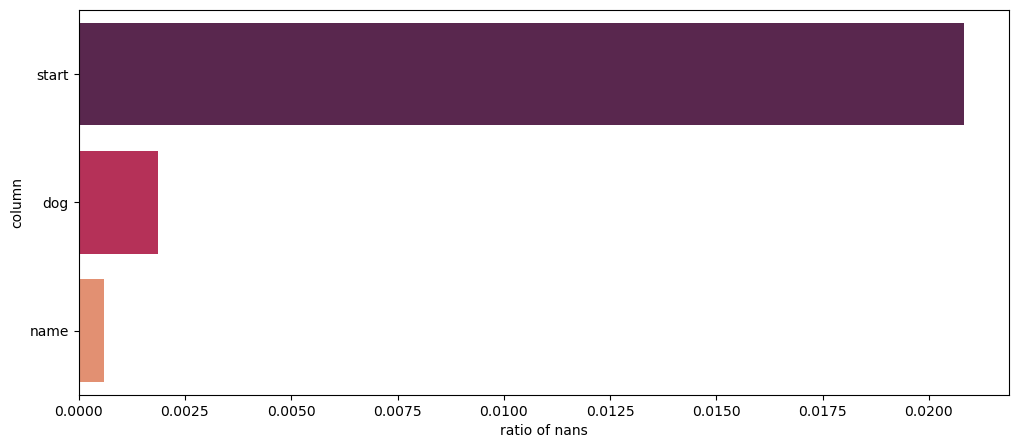

In [370]:
#g = dfc[dfc.columns[dfc.isna().any(0)]].isna().sum().sort_values(ascending=False) / dfc.shape[0]
g = dfc[dfc.columns[dfc.isna().any()]].isna().sum().sort_values(ascending=False) / dfc.shape[0]
g = g.reset_index().rename(columns={'index': 'column', 0: 'nans'})
sns.barplot(x='nans', y='column', data=g, ax=plt.subplots(1,1,figsize=(12,5))[1], palette='rocket')
plt.xlabel('ratio of nans');

__az üres name mezőket tartalmazó sorok törölhetők, ezeket nem tudjuk előállítani más adatból__

In [371]:
condition = (dfc['name'].isna()) 
filtered_dfc = dfc[~condition]

In [372]:
# Replace 'run in' with np.nan
filtered_dfc['dog'].replace('run in', np.nan, inplace=True)
# Replace 'run in' with np.nan
filtered_dfc['dog'].replace('run_in', np.nan, inplace=True)
# Replace 'run in' with np.nan
filtered_dfc['dog'].replace('error', np.nan, inplace=True)
# Replace 'run in' with np.nan
filtered_dfc['dog'].replace('outside', np.nan, inplace=True)
# Replace 'error' with np.nan
filtered_dfc['start'].replace('error', np.nan, inplace=True)
# Replace 'error' with np.nan
filtered_dfc['start'].replace('run in', np.nan, inplace=True)
# Replace 'error' with np.nan
filtered_dfc['start'].replace('run_in', np.nan, inplace=True)

# Replace '2123' with '2023'
filtered_dfc['when'] = pd.to_datetime(filtered_dfc['when'])
# Az évek cseréje 2123-ról 2023-ra
old_year = 2123
new_year = 2023
filtered_dfc['when'] = filtered_dfc['when'].mask(filtered_dfc['when'].dt.year == old_year, 
                                                   filtered_dfc['when'] + pd.offsets.DateOffset(years=new_year - old_year))
filtered_dfc['when'] = filtered_dfc['when'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Az évek cseréje 2024-ről 2023-ra azoknál az időpontoknál, amelyek a jövőben vannak
filtered_dfc['when'] = filtered_dfc['when'].apply(replace_year_if_future)


C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\3852421237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dfc['dog'].replace('run in', np.nan, inplace=True)
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\3852421237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dfc['dog'].replace('run_in', np.nan, inplace=True)
C:\Users\zertr\AppData\Local\Temp\ipykernel_13880\3852421237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [373]:
dfc = filtered_dfc

dfc['dog'] = pd.to_numeric(dfc['dog'].fillna('0'))
#print(dfc['dog'].unique())
mean_dog = dfc['dog'].mean()
dfc['dog'].replace(0., mean_dog, inplace=True)

dfc['start'] = pd.to_numeric(dfc['start'].fillna(0))
mean_start = dfc['start'].mean()
dfc['start'].replace(0., mean_start, inplace=True)

In [374]:
for c in dfc.select_dtypes('number'):
    dfc[c] = dfc[c].fillna(dfc[c].mean())
dfc

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,1,3.83,Lippi,0.170000
1,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,2,3.99,Brutus,0.208117
2,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,3,3.72,Tony,0.208117
3,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,4,3.70,Meggie,0.180000
4,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,1,5.10,Jessie,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28891,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,Flyvaryors Traditional,X-treme,16.34,W,27.5,P,4,3.77,Meggie,0.200000
28892,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,X-treme,Flyvaryors Traditional,16.78,L,25.0,K,1,4.04,Kerby,0.120000
28893,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,X-treme,Flyvaryors Traditional,16.78,L,25.0,K,2,4.03,Nesi,0.210000
28894,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,X-treme,Flyvaryors Traditional,16.78,L,25.0,K,3,3.87,Mína,0.208117


In [375]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28879 entries, 0 to 28895
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   run       28879 non-null  object 
 1   place     28879 non-null  object 
 2   division  28879 non-null  int64  
 3   when      28879 non-null  object 
 4   who       28879 non-null  object 
 5   withwho   28879 non-null  object 
 6   total     28879 non-null  float64
 7   WLT       28879 non-null  object 
 8   hurdless  28879 non-null  float64
 9   colour    28879 non-null  object 
 10  running   28879 non-null  int64  
 11  dog       28879 non-null  float64
 12  name      28879 non-null  object 
 13  start     28879 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 3.3+ MB


In [376]:
dfc.to_csv('02.FLYBALLCZ_versenyadatok.csv', sep=';', index=False)  